# Computing parameters analytically V

## Normal equation

For some linear regresion problems will give us a much better way to solve for the optimal value of theta parameters.
So far we got familiar with <code>**Gradient descent algorithm**</code> in order to minimize J(θ) we would take this iterative algorithm that takes <code>**many steps and multiply iterations**</code> of gradient descent to converge to the global minimum.

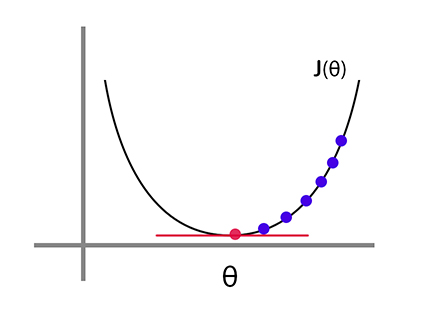

In contrast the <code>**Normal equation**</code> would provide us with method to <code>**solve for θ analytically**</code>. Rather than running iterative gradient descent  we can solve for the optimal value for θ all in <code>**one shot, one single step**</code>.
Although this method has its own downside on usage, but firstly lets get familiar with it and get some intuition.

Let's say that we have a cost function that's a quadratic funtion of this real value parameter θ and its expression looks like that:

\begin{multline*}
\text{1D} \ (\theta \in \mathbb{R})
\end{multline*}
\begin{multline*}
J(\theta) = a\theta^2 + b\theta +c
\end{multline*}

How do we minimize a quadratic function. The way to minimize a function is to take derivatives and set derivatives equal to zero.

\begin{multline*}
\dfrac{d}{d\theta}J(\theta) = ... = 0
\end{multline*}

We take the derivative of J with resepect to the paramter of θ we get some expresion (not derived in example) and then we set it to equal to 0. And this solves for value of θ that minimizes J(θ). Thats a simpler case when data was <code>**just real number**</code>. But the problem we are interested that θ is no longer a real number  but instead its this <code>**n+1 dimensional parameter vector**</code> and our cost function J is a function of this vector value or θ_0 to θ_n. And how do we minimize this cost function ?

\begin{multline*}
\vec{\theta} \in \mathbb{R^{n+1}}
\end{multline*}

\begin{multline*}
J(\theta_{0}, \theta_{1}, ...,\theta_{n}) = \dfrac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2 
\end{multline*}


\begin{multline*}
\dfrac{\partial}{\partial\theta_{j}}J(\theta) = ... = 0 \ \text{(for every j)}
\end{multline*}

\begin{multline*}
\text{Solve for} \ \theta_{0}, \theta_{1}, ...,\theta_{n}
\end{multline*}

Calculus tells us that one way to do so is to take the partial devivative of J with respect to every parametr of θ J in turn and then set it all of these to zero. If we do that we solve for the values of θ_0 up to θ_n. This will give us the value that minimize cost function J <code>(**derivation ends up being somewhat involved**)</code>. But lets try another method that doesn't not involve derivation which is kind of long. There is another way to solve for theta values that corresponds to where the partial derivatives is equal to zero (minimize the cost function of J(θ).

Lets get back at our boston real estate data as an example. <br>

<code>**Attribute Information (in order):**</code>
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10 000 USD
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

lets say we have <code>**m=5**</code> training examples. In order to implment <code>**normal equation**</code> method we must do the following. Add extra column that corresponds for extra feature<code>**x_0 that always take value of 1**</code>.

In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# just for the nicer style

plt.style.use('seaborn-whitegrid')
from pandas import Series, DataFrame
from sklearn.datasets import load_boston

data_set = load_boston()
boston_df = DataFrame(data_set.data)
boston_df.columns = data_set.feature_names

# adding x0 extra features column
x_0 = [1] * len(boston_df)
boston_df.insert(0,'x0', x_0)

boston_df['Kaina tūks. $'] = data_set.target
boston_df.head()
#print(data_set.DESCR)

,x0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Kaina tūks. $
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's assume this all data we have and construct a matrix called <code>**X**</code> that's basically contains all of the features from our training data. Just copy all of the data into matrix column at a time.

\begin{multline*}
X = 
\begin{bmatrix}
1 & 0.00632 & 18.0 & 2.31 & 0.0 & 0.538 & 6.575 & 65.2 & 4.0900 & 1.0 &	296.0 & 15.3 & 396.90 &	4.98 \\
1 &	0.02731 & 0.0 &	7.07 &	0.0 & 0.469 & 6.421 & 78.9 & 4.9671 & 2.0 &	242.0 &	17.8 & 396.90 &	9.14 \\
1 &	0.02729 & 0.0 &	7.07 &	0.0 & 0.469 & 7.185 & 61.1 & 4.9671 & 2.0 &	242.0 &	17.8 & 392.83 &	4.03 \\
1 &	0.03237 & 0.0 &	2.18 &	0.0 & 0.458 & 6.998 & 45.8 & 6.0622 & 3.0 &	222.0 &	18.7 & 394.63 &	2.94 \\
1 &	0.06905 & 0.0 &	2.18 &	0.0 & 0.458 & 7.147 & 54.2 & 6.0622 & 3.0 &	222.0 &	18.7 & 396.90 &	5.33
\end{bmatrix}
\end{multline*}

\begin{multline*}
X  \ m \times (n+1)
\end{multline*}

X is m by n+1 dimensional matrix

Do the same for <code>**y**</code>, make a vector<br>

\begin{multline*}
y = 
\begin{bmatrix}
24 \\
21.6 \\
34.7 \\
33.4 \\
36.2
\end{bmatrix}
\end{multline*}
\begin{multline*}
y \ m \times 1
\end{multline*}

y vector is m dimensional vector

And finally if taken <code>**matrix X and vector y**</code> and compute this so called <code>**normal equation**</code>:<br>

\begin{multline*}
\theta = (X^{\top}X)^{-1} X^{\top}\vec{y}
\end{multline*}

This will give us the value of θ that minimizes our cost function J(θ). 

<div class="alert alert-block alert-info">
<h2>Matrix differentiation</h2>

<code>**RSS - Residual sum of squares**</code>
    
<code>**X = m x 1**</code><br>
<code>**A = n x m**</code>

\begin{multline*}
y = A \rightarrow \dfrac{\delta y}{\delta x} = 0
\end{multline*}
    
\begin{multline*}
y = Ax \rightarrow \dfrac{\delta y}{\delta x} = A
\end{multline*}
    
\begin{multline*}
y = xA \rightarrow \dfrac{\delta y}{\delta x} = A^{\top}
\end{multline*}
   

\begin{multline*}
y = x^{\top}Ax \rightarrow \dfrac{\delta y}{\delta x} = 2x^{\top}A
\end{multline*}
    
    
<code>**By using these rules we derive:**</code>
    
\begin{multline*}
RSS = y^{\top}y - y^{\top}X\hat{\beta} - \hat{\beta}X^{\top}y + \hat{\beta^{\top}}X^{\top}X\hat{\beta}
\end{multline*}
<br>
\begin{multline*}
\dfrac{\delta(RSS}{\delta \hat{\beta}} = \dfrac{\delta(y^{\top}y - y^{\top}X\hat{\beta} - \hat{\beta}X^{\top}y + \hat{\beta^{\top}}X^{\top}X\hat{\beta})}{\delta \hat{\beta}} = 0
\end{multline*}    
<br>
\begin{multline*}
\dfrac{\delta(y^{\top}y)}{\delta\hat{\beta}} = \dfrac{\delta(y^{\top}X\hat{\beta})}{\delta\hat{\beta}} - \dfrac{\delta(\hat{\beta}X^{\top}y)}{\delta\hat{\beta}} + \dfrac{\delta(\hat{\beta^{\top}}X^{\top}X\hat{\beta})}{\delta\hat{\beta}} = 0
\end{multline*}       
<br>
\begin{multline*}
0 - y^{\top}X - (X^{\top}y)^{\top} + 2\hat{\beta}^{\top}X^{\top}X = 0
\end{multline*}  
  
\begin{multline*}
0 - y^{\top}X - y^{\top}X + 2\hat{\beta}^{\top}X^{\top}X = 0
\end{multline*} 
    
\begin{multline*}
2\hat{\beta}^{\top}X^{\top}X =2y^{\top}X
\end{multline*} 

\begin{multline*}
\hat{\beta}^{\top}X^{\top}X =y^{\top}X
\end{multline*} 

\begin{multline*}
\hat{\beta}^{\top} =y^{\top}X(X^{\top}X)^{-1}
\end{multline*} 
  
\begin{multline*}
\hat{\beta} =(X^{\top}X)^{-1} X^{\top}y
\end{multline*} 
</div>

In [82]:
import numpy as np 
import pandas as pd

In [95]:
df = pd.read_csv('../data_samples/multivariate_housing_prices.csv')
df.head()

,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [99]:
X = df.values[:,0:2]
y = df.values[:,2]

In [102]:
X.shape

(47, 2)

In [103]:
X = np.insert(X, 0, 1, axis=1)

In [104]:
θ = np.linalg.inv( (X.T.dot(X)) ).dot( X.T ).dot(y)

In [105]:
θ

array([89597.9095428 ,   139.21067402, -8738.01911233])

In [106]:
test_X = df.values[0, 0:2]  
test_y = df.values[0,   2]

\begin{multline*}
\hat{y} = h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}
\end{multline*}

In [107]:
def predict(X):
    return θ[0] + θ[1]*X[0] + θ[2]*X[1]

In [109]:
y_hat = predict(test_X)

In [111]:
print(f"predicted: {y_hat}")
print(f"real: {test_y}")

predicted: 356283.1103388976
real: 399900


In the general case lets say we have <code>**m training examples**</code> and <code>**n features**</code> 

\begin{multline*}
\text{m examples} \ (x^{(1)}, y^{(1)}), ... , (x^{(m)}, y^{(m)}); \ \text{n features}
\end{multline*}

\begin{multline*}
x^{(i)}= 
\begin{bmatrix}
x^{(i)}_0 \\
x^{(i)}_1 \\
x^{(i)}_2 \\
. \\
. \\
. \\
x^{(i)}_n
\end{bmatrix}
\in \mathbb{R^{n+1}}
\end{multline*}

The design matrix , - each training example gives us a feacture vector like shown above sort of n+1 dimensional vector.
We take the first <code>**training example**</code>vector and take it's<code>**transpose**</code>. That ends up being a first row of our design matrix. To the same with second and fort on until last training example.

\begin{multline*}
X = 
\begin{bmatrix}
--- & (x^{(1)})^{\top} & --- \\
--- & (x^{(2)})^{\top} & --- \\
. \\
. \\
. \\
--- & (x^{(m)})^{\top} & --- \\
\end{bmatrix}
\end{multline*}

\begin{multline*}
m \times (n+1)
\end{multline*}

### Example

As a specific example case, let's say we have only one feature other then x_0 which is always equal to 1. So our feature vectors x_i are equal to this, one and some real feature:

\begin{multline*}
\text{E.g if} \ x^{(i)} = 
\begin{bmatrix}
1 \\
x^{(i)}_1
\end{bmatrix}
\end{multline*}

Then our design matrix would be equal to this:

\begin{multline*}
X = 
\begin{bmatrix}
1 & x^{(1)}_1 \\
1 & x^{(1)}_2 \\
. \\
. \\
. \\
1 & x^{(1)}_m
\end{bmatrix}
\end{multline*}

\begin{multline*}
m \times 2 \ \text{dimensional vector}
\end{multline*}

The vector y is obtained by taking all the labels (housing prices) of our training set and just stacking them up into <code>**m dimensional vector**</code>.

\begin{multline*}
\vec{y} = 
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
. \\
. \\
. \\
y^{(m)} \\
\end{bmatrix}
\end{multline*}

## Homework practice exercise

Suppose you have the training in the table below:

<table>
<tbody>
    <tr><td>age(x1)</td><td>height in cm(x2)</td><td>weight in kg(y)</td></tr>
    <tr><td>4</td><td>89</td><td>16</td></tr>
    <tr><td>9</td><td>124</td><td>28</td></tr>
     <tr><td>5</td><td>103</td><td>20</td></tr>
</tbody>
</table>
<br>

You would like to predict  persons weight as a function of his age and height with the model:

\begin{multline*}
\text{weight} \ = \theta_{0} + \theta_{1}age + \theta_{2}height
\end{multline*}

<code>**X and y?**</code>

Finaly after constructing matrix X and vector y. We compute θ as normal equation states:

\begin{multline*}
\theta = (X^{\top}X)^{-1} X^{\top}y
\end{multline*}

Lets make sense of this equation and get intuition how to implement this.

\begin{multline*}
(X^{\top}X)^{-1} \ \text{is inverse of matrix} \ X^{\top}X.
\end{multline*}

\begin{multline*}
 A = X^{\top}X
\end{multline*}

\begin{multline*}
(X^{\top}X)^{-1} = A^{-1}
\end{multline*}

This means <code>**firstly we compute X transpose dot product with X and then we computer inverse**</code>.

In [75]:
import numpy as np

X = np.array([
    [1, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98],
    [1, 0.02731, 0.0 , 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14],
    [1, 0.02729, 0.0 , 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03],
    [1, 0.03237, 0.0 , 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94],
    [1, 0.06905, 0.0 , 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.90, 5.33]
], dtype=np.float_)

y = np.array([24, 21.6, 34.7, 33.4, 36.2])
θ = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

print(f"shape of θ: {θ.shape}\n")
print(f"optimal values of theta that minimizes the cost function J(θ) for linear regression:\n{θ}")

shape of θ: (14,)

optimal values of theta that minimizes the cost function J(θ) for linear regression:
[-3.01294416e-02  1.26857802e+00  1.12824329e+00  3.45183391e-01
  2.50855988e-15 -7.87896192e-03  1.74831793e+01  2.54654286e-01
 -3.96455786e-01 -2.98103936e-01 -4.03297595e-01 -8.50652900e-01
  2.50496995e-02 -8.56687857e-01]


Do we missed something ? Remember we talked about <code>**feature scalling**</code> about the idea to get features on similar ranges of values of each other. If we are using <code>**normal equation**</code> method then feature scaling isn't actually necessary. It is okay if say:

$$ 0 \leq x_{1} \leq 1 $$

$$ 0 \leq x_{2} \leq 1000 $$

$$ 0 \leq x_{3} \leq 10^{-5} $$

<code>**There is no need to do feature scaling if we are using normal equation method**</code> Only if gradient descent is used than this procedure is very important

 So far it seems the balance is in favor for normal equation. Although there are some drawbacks for both:

\begin{multline*}
\text{m training examples, n features}
\end{multline*}

<code>**Gradient descent**</code>
 * Need to choose α learning rate;
 * Needs many interations;
 * Works well even when n is large, like milions of features.
 
 <code>**Normal equation**</code>
 * No need for α;
 * No iterations.
 * Slow if n is very large;
 * Needs to compute inverse of (X transpose dot X ). And thats nxn matrix and we have n features is like O(n cubed)

So basically to decide which to use is to <code>**regard the size of n**</code> and in that case use normal equation if <code>**n = 100, n = 1000**</code> but if it gets <code>**bigger then n = 10 000**</code> I suggest to go with the gradient descent. So if features reach around 10 000 consider switching to gradient descent or other algoritms that we will talk about later.

<code>**NOTE**</code> we have not yet talk about other ML algorithms but just in advance i want to let you know that for those more sophisticated like classification, logistic regression learning algorithms <code>**normal equation**</code> actually doesn't work and we will have to use<code>**gradient descent**</code>. But in the realm of linear regression and depending on the details of your problem and how many features that you have normal equation is a good option to consider.

## Noninvertibility

<code>**Optional topic**</code><br>
There is a issue with normal equation method that you will run into quite rarely but still: <code>**god damn it Janice its a singular matrix!**</code><br>

<code>**Normal equation**</code><br>

\begin{multline*}
\theta = (X^{\top}X)^{-1} X^{\top}y
\end{multline*}

What if X transpose dot X is non-invertible? A.k.a singular matrix/degenerate. <br>
Only some matrices are invertable. But overcome the issue at least in <code>**numpy**</code> we have an option <code>**instead of using np.linalg.inv() method, we can use np.linalg.pinv()**</code> and ussualy it does the right thing. And most of libraries in other programming languages has two methods for inverting matrices <code>**inv() and pinv()**</code>. The difference between these two is that one of them is called pseudo-inverse and the other is just inverse. The thing that you should remember is that <code>**pinv**</code> will compute inverse even on non-invertible matrix.</br>

If X transpose dot X is non invertible usuall causes for that are:<br>
 * 1)
Somehow in our learning problem we have rendundant features <code>**(linearly dependant)**</code>
If we are trying to predict housing prices and if x_1 is the size of square meters and x_2 maybe square feet, so there is linear dependecy between these two features.

 * 2) 
 To many features (e.g m <= n). If we have lets say 15 training examples (m=15) and features (n=100) then we are trying to fit a parameter vector theta which is (100+1) dimensional. So it happens that we are trying to fit 101 parameters from just 15 training examples. Although it sometimes work but in general it is not a good idea. It just to little data to fit so much parameters. Later we will get to know exactly why but for now just try to delete some features or use technique called <code>**regularization**</code> that we will cover soon, but basically what it does its lets us fit a lot of parameters even if we have a relatively small training set.

And in case you don't want to make things correct there is always this <code>**pseudo-inverse**</code> method <code>**pinv()**</code> that can be very handy at times.